In [26]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter 
import sys, os
import imageio, re
import importlib as imp
import copy
import pandas as pd

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

import pickle

#the objective of Nextgen is to make models work together


In [27]:
# Py
#sim_case = 'sim_case3_data.out'
sim_case = 'pickle_jar/sim_phillipsburg_dataPET.out'
py_path_layers = '/Users/ahmadjan/codes/side/alt-modular_july7/Modules/GAR/LGAR_BMI/%s'%sim_case
#sim_case = 'pickle_jar/sim_phillipsburg_dataPET.out'#LGAR_output0_phillipsburgAET.pkl'
#py_path_vars = '/Users/ahmadjan/codes/side/alt-modular_july7/Modules/GAR/LGAR_BMI/%s'%sim_case

# C 
#sim_case = 'sim4_phil_data.out'
sim_case = 'phil_case/data_layers_AET.out'
c_path_layers = '/Users/ahmadjan/codes/codes_test/xlgar_code_3Jun2022/%s'%sim_case
#sim_case = 'data_variables.out'
#c_path_vars = '/Users/ahmadjan/codes/codes_test/xlgar_code_3Jun2022/%s'%sim_case

In [15]:
#d = pd.read_pickle(py_path_vars)
#d

In [16]:

data_sim_c = np.loadtxt(c_path_layers,dtype='str')
data_sim_py = np.loadtxt(py_path_layers,dtype='str',delimiter='\t')

Depth_d = []
Theta_d = []
Head_d = []
Dat_u = []
Dat_v = []
if 'phil' in sim_case:
    layer_depth = [0.0, 440.0, 1750.0, 2000.]
else:
    layer_depth = [0.0, 100.0, 200.0, 300.]

count = 0
for u, v in zip(data_sim_c,data_sim_py):
    u1 = u[1:-1].split('|')
    v1 = v[1:-1].split('],')
    val_u = []
    val_v = []
    for u2 in u1:
        u3 = u2[1:-1].split(',')
        u4 = [float(u3[0]), float(u3[1]), float(u3[4])]
        val_u.append(u4)
        
    for v2 in v1:
        v3 = v2[1:-1].split(',')
        v3[0] = v3[0].replace('[', '')
        #depth = float(v3[0])
        
        depth = float(v3[0]) + layer_depth[int(v3[2])]
        v4 = [depth, round(float(v3[1]),6), float(v3[2])]
        
        val_v.append(v4)
        
    count = count + 1
    Dat_u.append(val_u)
    Dat_v.append(val_v)

    
    
def data_gen1():
    for u in data_sim_c[::12]:
        v1 = u[1:-1].split('|')
        val_c = []
        
        for v2 in v1:
            v3 = v2[1:-1].split(',')
            v4 = [float(v3[0]), float(v3[1]), float(v3[4])]
            val_c.append(v4)
        
        yield val_c

time = np.arange(0,len(Dat_v)/12.,1.) # 1/12 = 5/60 (min/hr)

time = [round (t,3) for t in time]
def data_gen2():
    c = -1
    #print (len(time))
    for u, v in zip(data_sim_c[::12],data_sim_py[::12]):
        u1 = u[1:-1].split('|')
        v1 = v[1:-1].split('],')
        val_u = []
        val_v = []
        for u2 in u1:
            u3 = u2[1:-1].split(',')
            u4 = [float(u3[0]), float(u3[1]), float(u3[4])]
            val_u.append(u4)

        for v2 in v1:
            v3 = v2[1:-1].split(',')
            v3[0] = v3[0].replace('[', '')
            depth = float(v3[0]) + layer_depth[int(v3[2])]
            v4 = [depth, round(float(v3[1]),6), float(v3[2])]
            #v4 = [float(v3[0]), round(float(v3[1]),6), float(v3[3])]
            val_v.append(v4)
        c = c +1
        
        yield time[c], val_u, val_v


In [17]:
print (Dat_u[-1]) # time, wetting front
print (Dat_v[-1])
#data_sim_py
print (len(Dat_u))
print (count)
print (time[:25], time[-1], time[12])
print (288/24.0, 12*24)
print (12*5/(60.), 288/60.*5, (5/60),len(Dat_v)/12.,)

[[35.837204, 0.218482, 1860.792705], [40.582282, 0.2124, 2053.561233], [440.0, 0.210836, 2107.894237], [475.183194, 0.307391, 2107.894237], [1750.0, 0.206964, 20000.0], [2000.0, 0.25001, 20000.0]]
[[35.83714352480717, 0.218482, 0.0], [40.58217337191165, 0.2124, 0.0], [440.0, 0.210836, 0.0], [475.18350679646136, 0.307391, 1.0], [1750.0, 0.206964, 1.0], [2000.0, 0.25001, 2.0]]
90001
90001
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0] 7500.0 12.0
12.0 288
1.0 24.0 0.08333333333333333 7500.083333333333


In [19]:
#DataC = dict()
#data_c_vars = pd.read_csv(c_path_vars)
#data_c_vars

In [20]:
#data_py_vars = pd.read_pickle(py_path_vars)

In [21]:
#data_py_vars

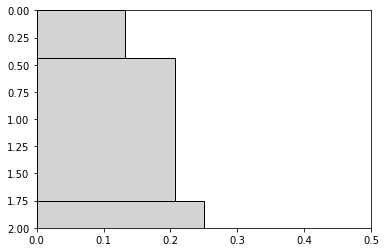

In [22]:
fig, axs = plt.subplots(1,1,figsize=(6,4))

len_simulation = len(Dat_u)
for i in range(len_simulation):
    d = Dat_u[i]
    num_wf = len(d)
    
    for j in range(num_wf):
        
        if j ==0 :
            #print (j, d[j][1], d[j][0])
            rect = Rectangle((0,0),d[j][1],d[j][0]*0.001,fc='lightgrey',ec='k',lw=1)
        else:
            #print (j, d[j-1][0], d[j][1], d[j][0])
            rect = Rectangle((0,d[j-1][0]*0.001),d[j][1],d[j][0]*0.001,fc='lightgrey',ec='k',lw=1)
        axs.add_patch(rect)
    
    axs.set_ylim(0,layer_depth[-1]*0.001)
    axs.invert_yaxis()
    axs.set_xlim(0,0.5)
    
    break

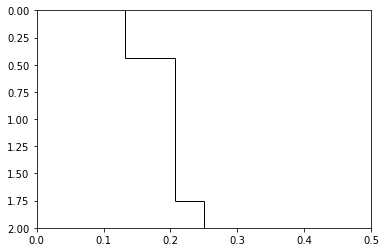

In [23]:
fig, axs = plt.subplots(1,1,figsize=(6,4))

len_simulation = len(Dat_u)
for i in range(len_simulation):
    d = Dat_u[i]
    num_wf = len(d)
    
    for j in range(num_wf):
        if j ==0 :
            axs.vlines(d[j][1],0,d[j][0]*0.001,color='k',lw=1)
        else:
            axs.vlines(d[j][1],d[j-1][0]*0.001,d[j][0]*0.001,color='k',lw=1)
            axs.hlines(d[j-1][0]*0.001,d[j-1][1],d[j][1],color='k',lw=1)
            #rect = Rectangle((0,d[j-1][0]*0.001),d[j][1],d[j][0]*0.001,fc='lightgrey',ec='k',lw=1)
        #axs.add_patch(rect)
    
    axs.set_ylim(0,layer_depth[-1]*0.001)
    axs.invert_yaxis()
    axs.set_xlim(0,0.5)
    
    break

<IPython.core.display.Javascript object>


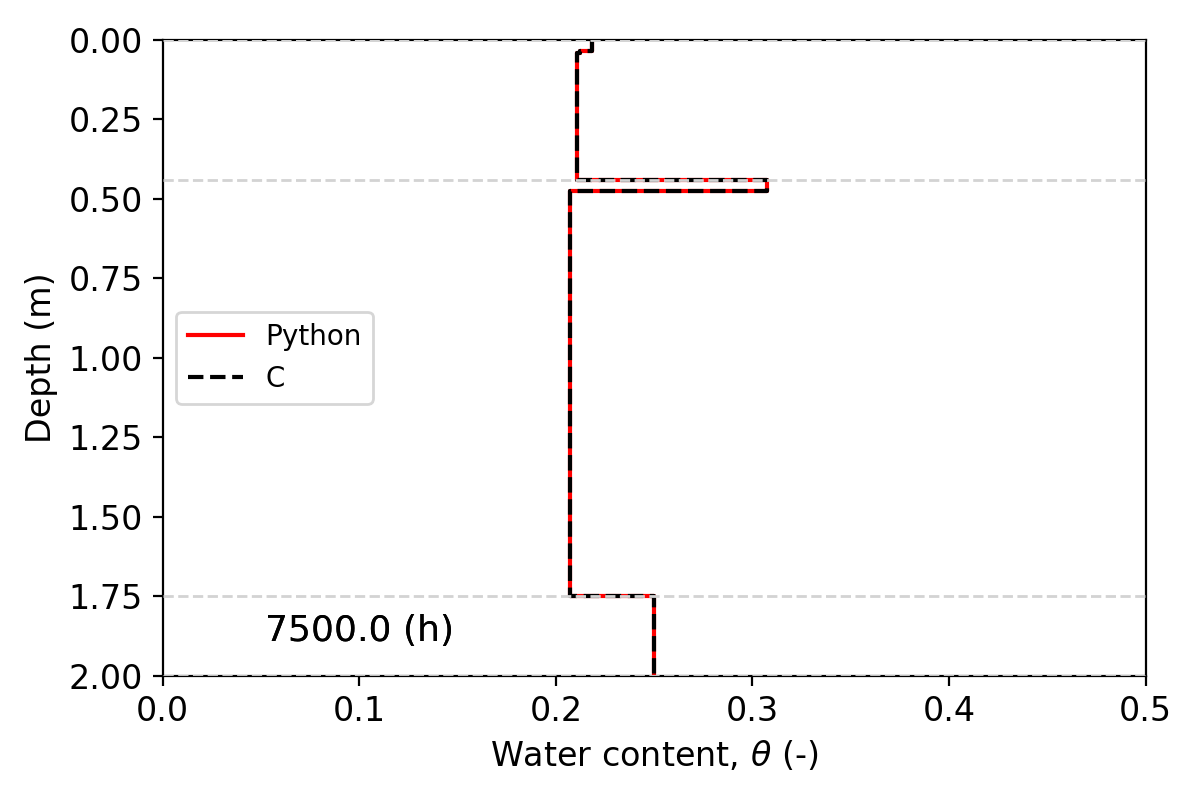

In [24]:
#%matplotlib inline
#%matplotlib qt
%matplotlib notebook
fig, axs = plt.subplots(1,1, figsize=(6,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
#axs = axs.ravel()

# intialize two line objects (one in each axes)
line = []
time_text = []

colors = ['r', 'k', 'lightgrey']
marks = ['solid','dashed' ]
labels = ['Python','C']


for i in range(3):
    
    if i == 2:
        for k in layer_depth:
            #print (k)
            axs.axhline(k*0.001, ls='dashed', color='lightgrey', lw=1, zorder=10)#axs.axhline(0, color='grey')
    else:
        l, = axs.plot([], [], lw=1.5,color=colors[i],ls=marks[i], label=labels[i])
    line.append(l)
    
    time_txt = axs.text(0.2, 0.07,"",horizontalalignment='center',verticalalignment='center',transform = axs.transAxes, fontsize=13)
    time_txt.set_text('')
    time_text.append(time_txt)
#print (line)
#print (layer_depth)
#graph = axs.plot([],[], 'lightgrey', lw=2)
#ax.axhline(0, ls='-', color='r', lw=1, zorder=10)#axs.axhline(0, color='grey')
#line, = axs.plot([], [], lw = 2)
for ax in [axs]:
    ax.set_ylim(0,layer_depth[-1]*0.001)
    ax.set_xlim(0, 0.5)
    #ax.grid()
    ax.invert_yaxis()
    ax.tick_params(axis='both', labelsize=12,rotation=0)
    
    axs.set_ylabel('Depth (m)',fontsize=12)
    axs.set_xlabel(r'Water content, $\theta$ (-)',fontsize=12)
    axs.legend(loc = 'center left')
global initial
def run(data):
    initial = True
    # update the data
    t, d, d2 = data
    num_wf = len(d)
        
    Xdata = []
    Ydata = []
    xdata = []
    ydata = []
    for i in range(num_wf):
        xdata.append([d[i][1],]*2)
        if i ==0:
            ydata.append([0,d[i][0]*0.001])
        else:
            ydata.append([d[i-1][0]*0.001,d[i][0]*0.001])
    
    xdata = np.concatenate(xdata)
    ydata = np.concatenate(ydata)
    Xdata.append(xdata)
    Ydata.append(ydata)
    
    xdata = []
    ydata = []
    for i in range(num_wf):
        xdata.append([d2[i][1],]*2)
        if i ==0:
            ydata.append([0,d2[i][0]*0.001])
        else:
            ydata.append([d2[i-1][0]*0.001,d2[i][0]*0.001])
    xdata = np.concatenate(xdata)
    ydata = np.concatenate(ydata)
    Xdata.append(xdata)
    Ydata.append(ydata)
    
    A = []
    for i in range(2):
        #if (t == 2007):
        line[i].set_data(Xdata[i], Ydata[i])
            
        
        time_text[i].set_text(str(t) + ' (h)')
        #else:
            #for k in layer_depth:
            #line[i].set_data([0.5, 0.5])
        #graph.set_data([0, 1],[0.5, 0.5])
            #    print (k)
        #p1 = axs[i].fill(ydata[i], xdata[i], lw=1,facecolor='w', ec='w',alpha=1.,ls='solid')
        #p1 = axs.axhline(layer_depth[0]*0.001, color='grey')
        #time_text[i].set_text(str(t))
        #p.append(p1)
        A.append(line[i])
        #A.append(p1)
        A.append(time_text[i])
        
    return A #line + [time_txt,], #p, 
#axs[5].axis('off')
if 'phil' in sim_case:
    anim = animation.FuncAnimation(fig, run, data_gen2, blit=True, interval=0.001,repeat=False,save_count=7500)
else:
    anim = animation.FuncAnimation(fig, run, data_gen2, blit=True, interval=1000,repeat=False,save_count=288)

plt.tight_layout(pad=1)
#plt.show()
#plt.show()

In [ ]:
f = "/Users/ahmadjan/codes/codes_test/xlgar_code_3Jun2022/animation.gif" 

writergif = animation.PillowWriter(fps=100) 
anim.save(f, writer=writergif)



In [25]:
f = "/Users/ahmadjan/codes/codes_test/xlgar_code_3Jun2022/animationA.mp4"

writervideo = animation.FFMpegWriter(fps=100)
anim.save(f, writer=writervideo)

plt.close()


In [ ]:
FFwriter = animation.FFMpegWriter(fps=1, extra_args=['-vcodec', 'libx264'])
anim.save(f, writer=FFwriter)